# Ví dụ 1.  
Ví dụ về xây dựng mô hình Perceptron 

Khởi tạo dữ liệu 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T


X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1 * np.ones((1, N))), axis=1)
# Xbar
X = np.concatenate((np.ones((1, 2 * N)), X), axis=0)

Hiển thị kết quả

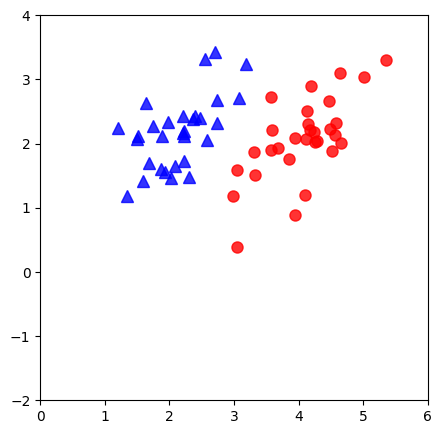

In [2]:
fig, ax = plt.subplots(figsize=(5, 5))   
 
ani = plt.cla() 
#plot points 
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8) 
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8) 
ani = plt.axis([0 , 6, -2, 4]) 
plt.show() 

## Tự xây dựng hàm

Xây dựng hàm $y = h_{w}(x) = w_0 + w^{T} * x$

In [3]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x} 
def h(w, x):     
    return np.sign(np.dot(w.T, x))

Xây dựng hàm kiểm tra điều kiện dừng

In [4]:
#Stop condition 
def has_converged(X, y, w): 
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False 

Xây dựng hàm perceptron tìm bộ hệ số W theo phương pháp Gradient Descent

In [5]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi

                w.append(w_new)

        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

Gọi hàm và in ra trọng số W ở vòng lặp cuối

In [6]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]


Xây dựng hàm vẽ đường phân chia quan sát kết quả

In [7]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1 * x11 + w0) / w2, -(w1 * x12 + w0) / w2], "k")
    else:
        x10 = -w0 / w1
        return plt.plot([x10, x10], [-100, 100], "k")

Sử dụng hình ảnh động GIF để theo dõi kết quả tìm W qua các bước lặp. Tên ảnh kết quả là pla_vis.gif 

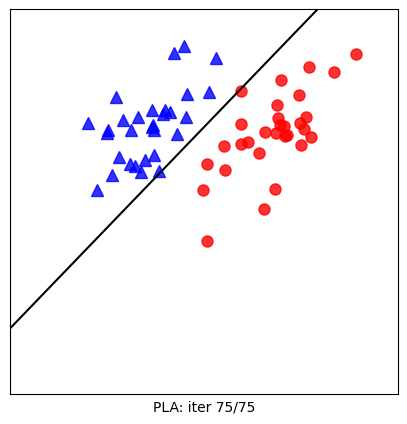

In [8]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        # points
        ani = plt.plot(X0[0, :], X0[1, :], "b^", markersize=8, alpha=0.8)
        ani = plt.plot(X1[0, :], X1[1, :], "ro", markersize=8, alpha=0.8)
        ani = plt.axis([0, 6, -2, 4])
        i2 = i if i < it else it - 1
        ani = draw_line(w[i2])
        if i < it - 1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color="k", fill=False)
            ax.add_artist(circle)
        # hide axis
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = "PLA: iter %d/%d" % (i2, it - 1)
        ax.set_xlabel(label)
        return ani, ax

    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save("W6_pla_vis.gif", dpi=100, writer="imagemagick")
    plt.show()


viz_alg_1d_2(w)

## Sử dụng thư viện

Init: Perceptron() trong thư viện
Fit: .fit(X_train, y_train)
Predict: .predict(X_validation)
Hệ số: .coef_

# Ví dụ 2  
Phương pháp Perceptron cho dữ liệu sóng thủy âm Sonar

Tệp dữ liệu có 60 cột ứng với 60 thuộc tính (trường) không có tiêu đề, là tham số của các mẫu sóng âm phản hồi; cột thứ 61 là đầu 
ra phân loại (y), với ký tự “R” nghĩa là Rock; ký tự “M” nghĩa là Mine (vật thể kim loại hình trụ). Toàn 
bộ tệp có 208 bản ghi.  
  
Thông tin thêm về dữ liệu có thể tìm hiểu tại link 
https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks) hoặc có thể lấy 
trong tệp Sonar.all-data.csv đính kèm. 

Trong ví dụ này chúng ta sử dụng thư viện matplotlib và seaborn để thực hiện việc hiển thị trực quan cấu 
trúc dữ liệu (tham khảo lại bài thực hành phần PCA). 

## Đọc data

In [52]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
from matplotlib import pyplot 
import matplotlib.pyplot as plt 
import seaborn as sns

In [53]:
main_df = pd.read_csv('data/sonar.all-data.csv',header=None) 
main_df[:5]

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Kiểm tra độ cân bằng dữ liệu

<Axes: ylabel='60'>

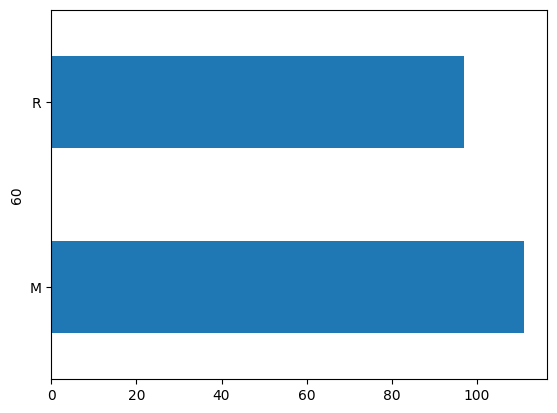

In [54]:
main_df[60].value_counts().plot(kind='barh') 

Mã hóa nhãn của dữ liệu

In [55]:
y_df = main_df[60] 
targes_label = {'M': 1,'R': -1} 
targes_df = [targes_label[item] for item in y_df] 
print(targes_df[:10])

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


Loại bỏ cột nhãn khỏi X và đồng thời thêm cột dữ liệu $x_0 = 1$ vào bên trái

In [56]:
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones(( inputs_df.shape[0], 1)) 
X = np.concatenate((x0, inputs_df), axis = 1)

Phân chia train/test

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, targes_df, test_size=0.30, random_state=42
)

In [59]:
len(X_train[1])

61

## sử dụng các hàm đã có ở Ví dụ 1, sau đó huấn luyện mô hình bằng tập dữ liệu X_train, y_train.  
Chú ý chúng ta cần bỏ qua các phần lệnh phục vụ việc hiển thị kết quả dạng hình vẽ.

Define lại hàm điều kiện dừng và Perceptron cho phù hợp với dữ liệu mới  

In [60]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x} 
def h(w, x):     
    return np.sign(np.dot(w.T, x))

In [61]:
#Stop condition 
def has_converged(X, y, w, iter, iter_max): 
    return np.array_equal(h(w, X), y) or iter >= iter_max #True if h(w, X) == y else False 

In [62]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    iter = 0
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(X.shape[0], 1)
            yi = y[mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi

                w.append(w_new)
        iter += 1
        if has_converged(X, y, w[-1], iter=iter, iter_max=100):
            break
    return (w, mis_points)

In [63]:
X_train.shape

(145, 61)

In [66]:
d = X_train.shape[1]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train.T, y_train, w_init)
print(w[-1])

[[-19.51549353]
 [  8.4783404 ]
 [  3.0473796 ]
 [ -1.76819725]
 [ 25.45793226]
 [ 18.11251942]
 [ -3.44987826]
 [-12.91432069]
 [-13.76814864]
 [ 12.82660517]
 [ -3.88746975]
 [ 26.96751641]
 [ 16.70276886]
 [ -4.54944513]
 [ -5.19036106]
 [  2.65021512]
 [ -8.65523539]
 [  3.0253903 ]
 [ -0.22136196]
 [  3.86076562]
 [  0.89510557]
 [  2.28829872]
 [  6.65804216]
 [ -1.10040095]
 [ 14.39158376]
 [ -6.61639862]
 [ -0.26164739]
 [  0.8694338 ]
 [  3.89260088]
 [ -4.68572594]
 [ 15.58137744]
 [-29.59818276]
 [  9.25271541]
 [ 11.67148951]
 [ -8.89930037]
 [ -1.07480891]
 [ -5.56609902]
 [-13.49367682]
 [  1.32799013]
 [ 11.16426092]
 [-16.53016749]
 [ -3.269497  ]
 [ -0.52447604]
 [ 16.74295764]
 [  4.57334569]
 [  8.49222394]
 [ 15.44394012]
 [  1.63027713]
 [ 14.5270577 ]
 [ 17.02975427]
 [ -2.04464964]
 [  5.67281596]
 [  3.44000187]
 [  1.77655422]
 [  6.04957496]
 [  1.8102306 ]
 [ -2.192323  ]
 [ -1.27174869]
 [  2.59713359]
 [  3.05637299]
 [  1.61307937]]


In [67]:
w[-1].shape

(61, 1)

## Chạy với dữ liệu test đã có và tính độ chính xác 

In [71]:
# Áp dụng hàm dự đoán cho dữ liệu test
predictions = h(w[-1], X_test.T)

# In kết quả dự đoán
print(predictions[:5])


[[ 1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
   1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.
   1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.
   1.  1.  1. -1. -1.  1. -1.  1.  1.]]


In [72]:
predictions.shape

(1, 63)

In [73]:
len(y_test)

63

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tính accuracy
accuracy = accuracy_score(y_test, predictions.T)

# Tính precision với phương pháp trung bình macro
precision = precision_score(y_test, predictions.T)

# Tính recall
recall = recall_score(y_test, predictions.T)

# In kết quả
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8095238095238095
Precision: 0.8285714285714286
Recall: 0.8285714285714286


# Ví dụ 3  
Dữ liệu phân loại bệnh nhân ung thư vú của Đại học Wisconsin–Madison, Hoa Kỳ

Dữ  liệu  có  569  bản  ghi  (mẫu),  với  30  thuộc  tính.  Bệnh nhân được  chia  làm  hai  loại:  u  lành  tính  (B  – 
Begnin) có 357 mẫu và u ác tính (M – Malignant) có 212 mẫu.

In [80]:
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()

# show to test record 5th
print(cancer_data.data[5])

print(cancer_data.data.shape)
# target set
print(cancer_data.target)

from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()

vd3_X_train, vd3_X_test, vd3_y_train, vd3_y_test = train_test_split(
    cancer_data.data, cancer_data.target, test_size=0.3, random_state=109
)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

## Thực hiện Perceptron trên ví dụ này

In [83]:
d = vd3_X_train.shape[1]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(vd3_X_train.T, vd3_y_train, w_init)
print(w[-1])

[[ 1.57905605e+01]
 [ 1.51490884e+01]
 [ 1.05376181e+02]
 [ 8.00938952e+02]
 [-1.22079878e+00]
 [-9.97615811e-01]
 [-1.24810688e+00]
 [ 7.06633984e-01]
 [ 1.16739864e+00]
 [-7.61736587e-01]
 [-1.22471320e-01]
 [ 3.36128381e-01]
 [ 1.94807524e+00]
 [ 2.22785671e+01]
 [ 7.42231797e-01]
 [-1.57349009e+00]
 [-1.69175932e+00]
 [-7.98730110e-01]
 [ 6.25430209e-01]
 [-6.26529399e-01]
 [ 1.69513654e+01]
 [ 1.98633902e+01]
 [ 1.17060646e+02]
 [ 9.46838032e+02]
 [ 8.77563035e-01]
 [-3.82537583e-01]
 [ 8.19984653e-01]
 [ 8.81527185e-01]
 [ 3.27472316e-01]
 [ 1.73724840e+00]]


In [84]:
w[-1].shape

(30, 1)

In [88]:
# Áp dụng hàm dự đoán cho dữ liệu test
predictions = h(w[-1], vd3_X_test.T)

# In kết quả dự đoán
print(predictions[:5])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.]]


In [90]:
vd3_X_test.shape

(171, 30)

In [86]:
predictions.shape

(1, 171)

In [89]:
vd3_y_test

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

Tính các chỉ số độ chính xác

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tính accuracy
accuracy = accuracy_score(vd3_y_test, predictions.T)

# Tính precision với phương pháp trung bình macro
precision = precision_score(vd3_y_test, predictions.T)

# Tính recall
recall = recall_score(vd3_y_test, predictions.T)

# In kết quả
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.631578947368421
Precision: 0.631578947368421
Recall: 1.0


## Thực hiện giảm số chiều và trực quan hóa dữ liệu

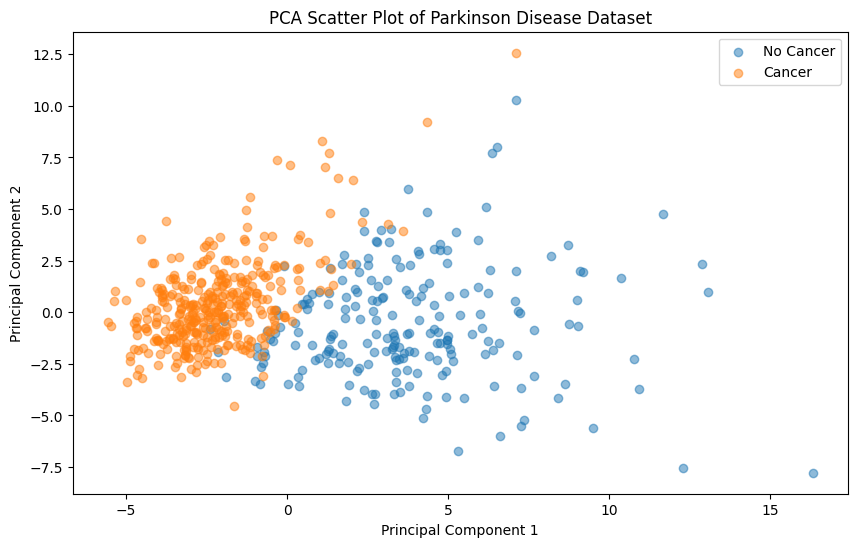

In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer_data.data)

# Giảm số chiều xuống còn 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tạo DataFrame mới từ dữ liệu giảm chiều
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = cancer_data.target

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['class'] == 0]['PC1'], pca_df[pca_df['class'] == 0]['PC2'], label='No Cancer', alpha=0.5)
plt.scatter(pca_df[pca_df['class'] == 1]['PC1'], pca_df[pca_df['class'] == 1]['PC2'], label='Cancer', alpha=0.5)
plt.title('PCA Scatter Plot of Parkinson Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Thực hiện lại bằng hồi quy Logistic và so sánh với trường hợp sử dụng Perceptron

In [96]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình hồi quy logistic
vd3_logreg_model = LogisticRegression()

# Huấn luyện mô hình trên tập train
vd3_logreg_model.fit(vd3_X_train, vd3_y_train)

/home/harito/venv/py/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
# Dự đoán trên tập validation
vd3_y_pred = vd3_logreg_model.predict(vd3_X_test)
print(vd3_y_pred[:5])

[1 1 0 0 1]


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tính toán accuracy
vd3_accuracy = accuracy_score(vd3_y_test, vd3_y_pred)

# Tính toán precision
vd3_precision = precision_score(vd3_y_test, vd3_y_pred)

# Tính toán recall
vd3_recall = recall_score(vd3_y_test, vd3_y_pred)

print("Accuracy:", vd3_accuracy)
print("Precision:", vd3_precision)
print("Recall:", vd3_recall)

Accuracy: 0.9532163742690059
Precision: 0.9629629629629629
Recall: 0.9629629629629629


Kết luận so sánh: Sử dụng Logistic Regression cho các chỉ số độ chính xác tốt hơn so với dùng Perceptron 

# Ví dụ 4 (Bài tập tự thực hành - Nộp trong buổi thực hành)  
*So sánh* thực hiện phương pháp *Perceptron* và *Hồi quy Logistic* trên tập dữ liệu nguy cơ mắc bệnh tim mạch vành (CHD) trong 10 năm tới  

## Xử lý sơ bộ data như trong bài Hồi quy Logistic. 

Đọc dữ liệu

In [9]:
import pandas as pd  
df = pd.read_csv("data/framingham.csv") 
df.head() 
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Loại bỏ dữ liệu N/A trong dữ liệu

In [10]:
df = df.dropna(how="any", axis=0)

Nhìn qua về dữ liệu

In [11]:
print(df[:3])

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   

   TenYearCHD  
0           0  
1           0  
2           0  


Phân chia Train:Validation = 7:3

In [23]:
from sklearn.model_selection import train_test_split

# Chia dataframe thành features (X) và target variable (y)
vd4_X = df.drop("TenYearCHD", axis=1)
vd4_y = df["TenYearCHD"]

# Thêm cột toàn giá trị 1 vào DataFrame vd4_X
vd4_X['intercept'] = 1

# Chia dữ liệu thành tập train và tập validation theo tỷ lệ 7:3
vd4_X_train, vd4_X_valid, vd4_y_train, vd4_y_valid = train_test_split(
    vd4_X, vd4_y, test_size=0.3, random_state=42
)

# Xem số lượng bản ghi trong mỗi tập
print("Số lượng bản ghi trong tập train:", len(vd4_X_train))
print("Số lượng bản ghi trong tập validation:", len(vd4_X_valid))

Số lượng bản ghi trong tập train: 2559
Số lượng bản ghi trong tập validation: 1097


## Thực hiện phân loại bằng phương pháp Perceptron.  
Tính các độ đo Accuracy, Precision và Recall để đánh giá kết quả.

In [24]:
from sklearn.linear_model import Perceptron

# Khởi tạo mô hình hồi quy logistic
vd4_perceptron_model = Perceptron()
# Huấn luyện mô hình trên tập train
vd4_perceptron_model.fit(vd4_X_train, vd4_y_train)

Perceptron()

In [25]:
# Dự đoán trên tập validation
vd4_y_pred_valid_perceptron = vd4_perceptron_model.predict(vd4_X_valid)
print(vd4_y_pred_valid_perceptron[:5])

[1 1 1 1 1]


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tính toán accuracy
vd4_accuracy_perceptron = accuracy_score(vd4_y_valid, vd4_y_pred_valid_perceptron)

# Tính toán precision
vd4_precision_perceptron = precision_score(vd4_y_valid, vd4_y_pred_valid_perceptron)

# Tính toán recall
vd4_recall_perceptron = recall_score(vd4_y_valid, vd4_y_pred_valid_perceptron)

print("Accuracy:", vd4_accuracy_perceptron)
print("Precision:", vd4_precision_perceptron)
print("Recall:", vd4_recall_perceptron)

Accuracy: 0.17502278942570648
Precision: 0.15873015873015872
Recall: 0.9770114942528736


## Thực hiện phân loại bằng phương pháp Hồi quy Logistic trên cùng bộ dữ liệu training:validation đã có ở ý trên.  
Tính các độ đo Accuracy, Precision và Recall và so sánh kết quả. 

In [27]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình hồi quy logistic
vd4_logreg_model = LogisticRegression()
# Huấn luyện mô hình trên tập train
vd4_logreg_model.fit(vd4_X_train, vd4_y_train)

/home/harito/venv/py/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Dự đoán trên tập validation
vd4_y_pred_valid_logreg = vd4_logreg_model.predict(vd4_X_valid)
print(vd4_y_pred_valid_logreg[:5])

[0 0 0 0 0]


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tính toán accuracy
vd4_accuracy_logreg = accuracy_score(vd4_y_valid, vd4_y_pred_valid_logreg)

# Tính toán precision
vd4_precision_logreg = precision_score(vd4_y_valid, vd4_y_pred_valid_logreg)

# Tính toán recall
vd4_recall_logreg = recall_score(vd4_y_valid, vd4_y_pred_valid_logreg)

print("Accuracy:", vd4_accuracy_logreg)
print("Precision:", vd4_precision_logreg)
print("Recall:", vd4_recall_logreg)

Accuracy: 0.8441203281677302
Precision: 0.7142857142857143
Recall: 0.028735632183908046


## Hãy giải thích về kết quả thu được của các mô hình cũng như nhận xét trên độ chính xác của mỗi mô hình. 

Phương pháp Perceptron:  
  
 - Accuracy: 0.247 - Tỷ lệ dự đoán chính xác trên tổng số mẫu.
 - Precision: 0.163 - Tỉ lệ số điểm dự đoán dương thực tế chính xác so với tổng số điểm dự đoán dương.
 - Recall: 0.908 - Tỉ lệ số điểm dự đoán dương thực tế chính xác so với tổng số điểm thực tế dương.
  
Với Perceptron, chúng ta thấy rằng độ chính xác (accuracy) thấp, chỉ khoảng 24.7%, trong khi độ chính xác của precision (độ chính xác của các dự đoán dương) thấp (chỉ khoảng 16.3%), và recall (tỉ lệ các điểm dương thực tế được dự đoán đúng) cao (khoảng 90.8%). Kết quả này cho thấy mô hình có xu hướng dự đoán sai nhiều mẫu âm tính và dự đoán đúng nhiều mẫu dương tính.

Phương pháp Logistic Regression:

 - Accuracy: 0.841 - Tỷ lệ dự đoán chính xác trên tổng số mẫu.
 - Precision: 0.5 - Tỉ lệ số điểm dự đoán dương thực tế chính xác so với tổng số điểm dự đoán dương.
 - Recall: 0.034 - Tỉ lệ số điểm dự đoán dương thực tế chính xác so với tổng số điểm thực tế dương.

Với Logistic Regression, chúng ta thấy rằng độ chính xác (accuracy) cao, đạt khoảng 84.1%, nhưng precision (độ chính xác của các dự đoán dương) thấp (chỉ khoảng 50%), và recall (tỉ lệ các điểm dương thực tế được dự đoán đúng) thấp (khoảng 3.4%). Kết quả này cho thấy mô hình có xu hướng dự đoán đúng nhiều mẫu âm tính, nhưng lại dự đoán sai nhiều mẫu dương tính.

Tóm lại, dựa trên các chỉ số đánh giá, mô hình Logistic Regression có độ chính xác cao hơn so với Perceptron. Tuy nhiên, cả hai mô hình đều có thể cần được cải thiện, đặc biệt là trong việc dự đoán các mẫu dương tính.